# 🧪 Lab 02: Regressão Linear Múltipla com Statsmodels

**Objetivo:**
Criar e validar um modelo de regressão linear para prever o consumo de combustível (`mpg`) com base em características do veículo. O foco principal é a **seleção de variáveis** (baseada em AIC/BIC) e a **análise de resíduos** para validar as premissas estatísticas do modelo.

**Conceitos Abordados:**
* **EDA (Exploratory Data Analysis):** Correlação (Heatmap) e Dispersão (Scatterplots).
* **OLS (Ordinary Least Squares):** Ajuste do modelo via `statsmodels`.
* **Seleção de Modelo:** Comparação de métricas AIC (Akaike Information Criterion) e BIC (Bayesian Information Criterion).
* **Diagnóstico de Resíduos:**
    * **Normalidade:** Teste de Shapiro-Wilk e Q-Q Plot.
    * **Homocedasticidade:** Análise visual dos resíduos.

In [ ]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
from statsmodels.datasets import get_rdataset

In [ ]:
# Carreganndo os dados
base = get_rdataset("mtcars").data
print(base.shape)

(32, 11)


In [20]:
print(base.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                     
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
rownames                 
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


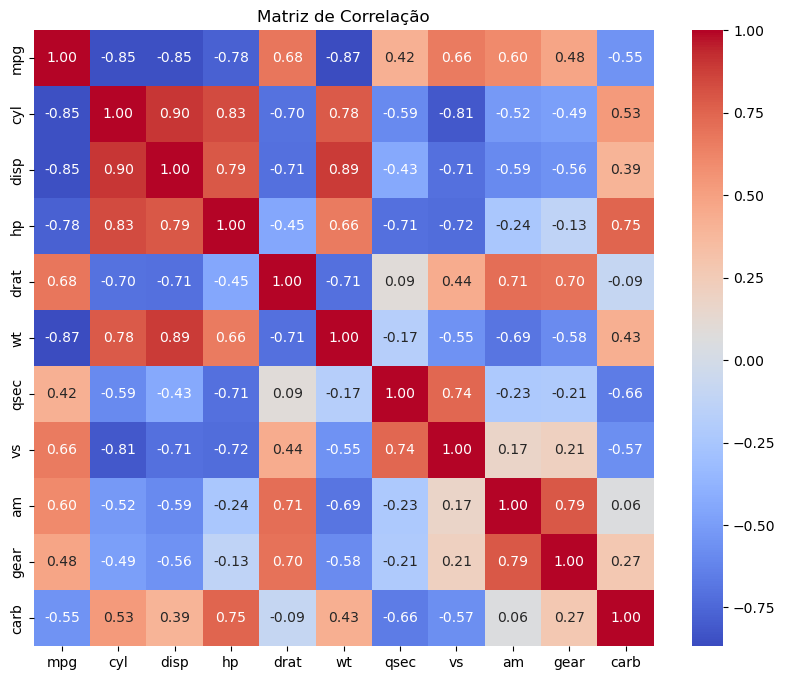

In [ ]:
# Mapa de Calor (Heatmap) para visualizar a correlação entre as variáveis
plt.figure(figsize=(10, 8))
correlation_matrix = base.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()

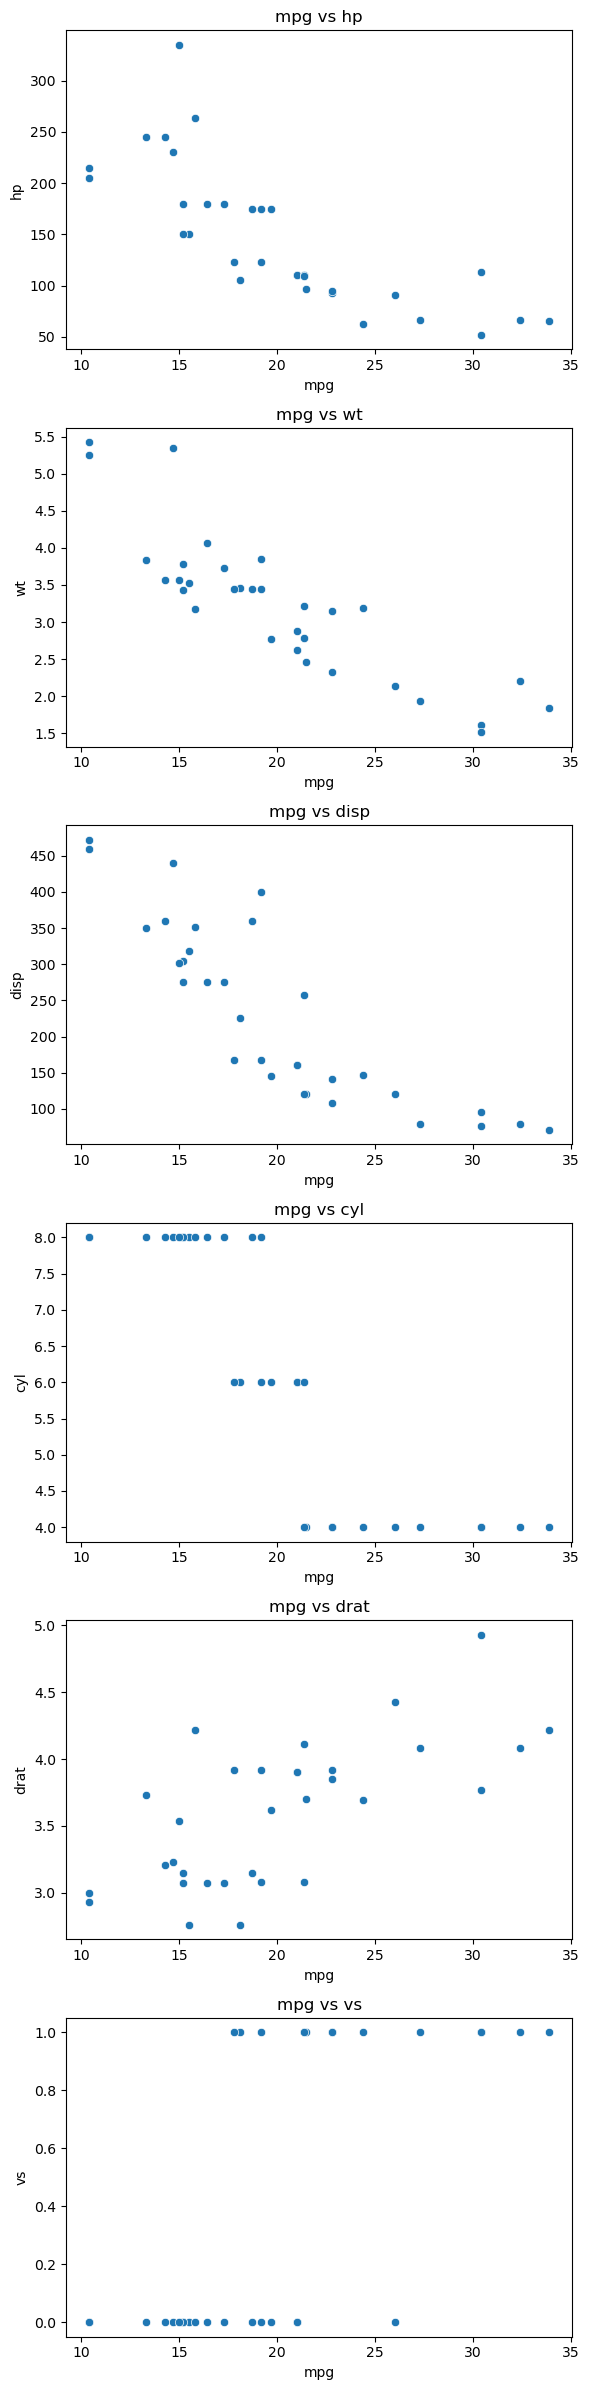

In [36]:
# Gráficos de Dispersão (Scatter plot)

features_to_analyze = [("mpg", "hp"), ("mpg", "wt"), ("mpg", "disp"), ("mpg", "cyl"), ("mpg", "drat"), ("mpg", "vs")]
n_plots = len(features_to_analyze)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(features_to_analyze):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [37]:
# Construção e Seleção do Modelo de Regressão Linear

# Comparação de modelos usando AIC e BIC

# aic 156.6 bic 162.5
# modelo = smf.ols(formula='mpg ~ wt + disp + hp', data=base)

# aic 179.1 bic 183.5
model_formula = 'mpg ~ drat + vs'
model = smf.ols(formula=model_formula, data=base)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           5.82e-07
Time:                        09:12:57   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Obtendo os resíduos (diferença entre valor real e previsto)
residuals = results.resid

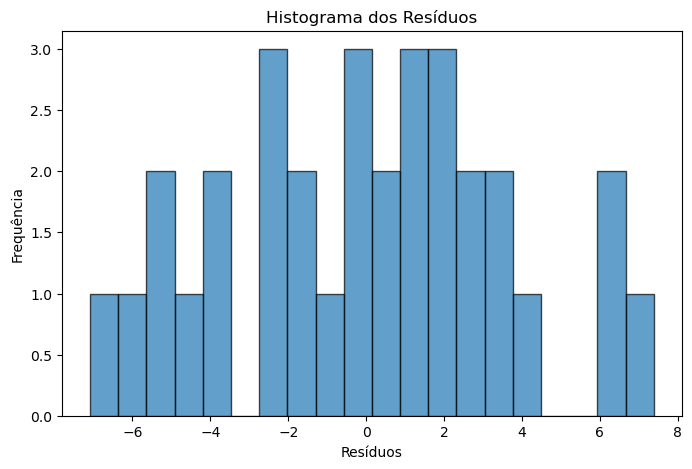

In [39]:
# Histograma dos Resíduos

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

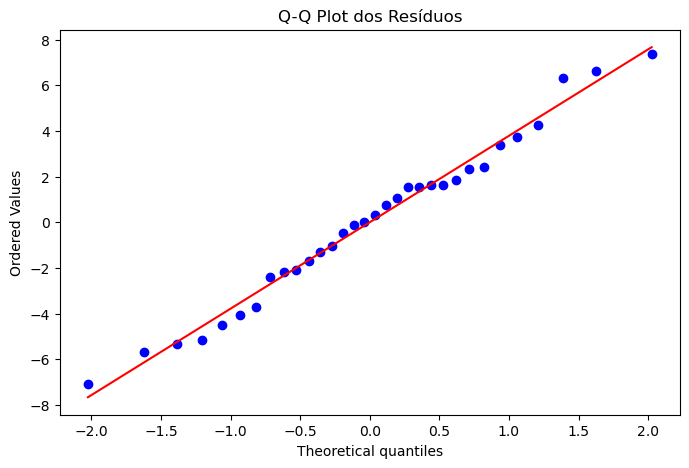

In [40]:
# Q-Q Plot (Quantile-Quantile Plot)

plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

In [43]:
# Teste de Shapiro-Wilk (Teste Estatístico de Normalidade)

# h0 - dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeitar a hipótese nula (estão normalmente distribuídos)
stat, p_value = stats.shapiro(residuals)
print(f'\nTeste de Shapiro-Wilk:')
print(f'Estatística: {stat:.3f}, P-value: {p_value:.3f}')

if p_value > 0.05:
    print("Resultado: Os resíduos parecem seguir uma distribuição normal (p > 0.05).")
else:
    print("Resultado: Os resíduos NÃO seguem uma distribuição normal (p <= 0.05). Modelo pode precisar de ajustes.")


Teste de Shapiro-Wilk:
Estatística: 0.981, P-value: 0.822
Resultado: Os resíduos parecem seguir uma distribuição normal (p > 0.05).
